# Conhecendo as Funções de Ativação

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

## Apresentação

No contexto das redes neurais artificiais, as funções de ativação representam as transformações aplicadas às entradas do neurônio sujeitas aos respectivos graus de contribuição (pesos) para decidir se este neurônio deve ou não disparar. Ao considerar as redes neurais feedforward multilayer perceptron, tais funções de ativação devem ser contínuas e deriváveis, sendo responsáveis por realizarem transformações não-lineares sucessivas da informação fornecida na camada de entrada até a camada de saída, fazendo com que o problema vá tornando-se linearmente separável à medida que adentra-se na rede.

Neste notebook, o seu objetivo é conhecer melhor as funções de ativação disponíveis na literatura e suas respectivas derivadas. Você irá construir gráficos que ilustrem tais funções.

## Requisitos

- Utilizar numpy
- Plotar com matplotlib

In [1]:
# Célula reservada para importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

## Intervalo de Entrada

- Todas as funções devem ser ilustradas no intervalo [-4,+4] com amostras intervaladas em 0.1 no eixo x
- Consulte a documentação de numpy.arange sobre como fazê-lo
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange
- Quantas amostras há em tal espaço de entrada?
- Qual o tipo deste dado?
- Qual a forma do espaço de entrada?

In [2]:
x = np.arange(-4, 4.1, 0.1)
# print(x)

In [3]:
print("Quantidade de amostras: ", len(x))

Quantidade de amostras:  81


In [4]:
print(type(x[0]))

<class 'numpy.float64'>


In [5]:
print(x.shape)

(81,)


### Função de ativação sigmoide

$$f(x) = \frac{1}{1 + e^{-\beta \cdot x}}$$

- Implemente uma função em Python que retorne o valor da função sigmóide para uma dada entrada
- Nesta função, considere beta como parâmetro nomeado com valor igual a 1.0
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função sigmoide
- Em um mesmo gráfico, ilustre 3 valores distintos para $\beta$:
  - $\beta = 0.7$ na cor laranja
  - $\beta = 0.5$ na cor verde
  - $\beta = 0.3$ na cor vermelha
  - Use legendas no gráfico

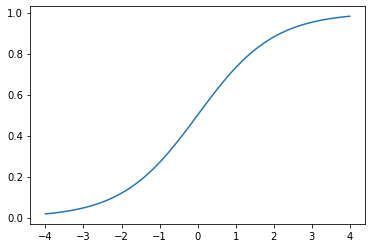

In [6]:
def valor_sig(x1, b):
    return (1/(1 + np.exp(-1*b*x1)))

y_sig = valor_sig(x, 1) #O array x, com beta = 1

plt.plot(x, y_sig)


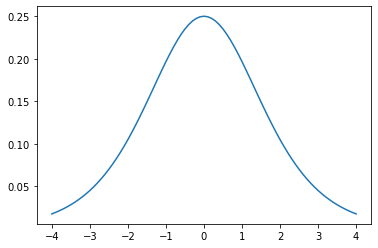

In [7]:
def valor_sig_derivative(sig , b):
    s = valor_sig(sig, b)
    ds = s*(1.0-s)
    return ds

y_sig_d = valor_sig_derivative(x, 1)

plt.plot(x, y_sig_d)

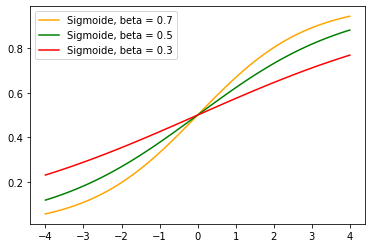

In [8]:
y_07 = valor_sig(x, 0.7)
y_05 = valor_sig(x, 0.5)
y_03 = valor_sig(x, 0.3)


plt.plot(x, y_07, "orange")
plt.plot(x, y_05, "green")
plt.plot(x, y_03, "red")

plt.legend(["Sigmoide, beta = 0.7", "Sigmoide, beta = 0.5", "Sigmoide, beta = 0.3"])

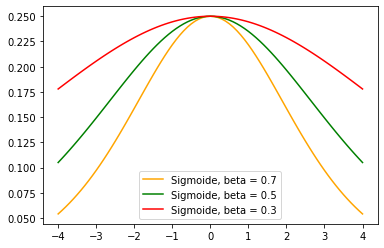

In [19]:
y_d_07 = valor_sig_derivative(x, 0.7)
y_d_05 = valor_sig_derivative(x, 0.5)
y_d_03 = valor_sig_derivative(x, 0.3)


plt.plot(x, y_d_07, "orange")
plt.plot(x, y_d_05, "green")
plt.plot(x, y_d_03, "red")

plt.legend(["Sigmoide, beta = 0.7", "Sigmoide, beta = 0.5", "Sigmoide, beta = 0.3"])

### Função de Ativação ReLU (Unidade Linear Retificada)

$$f(x) = max(0,x)$$

- Implemente uma função em Python que retorne o valor da função ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função ReLU

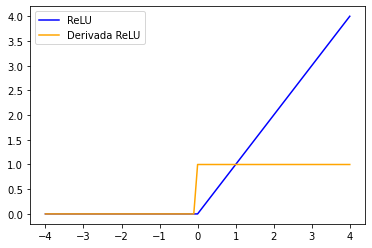

In [9]:

def func_relu(x1):
    y = np.maximum(x1, 0)
    return y

def relu_derivative(y1):
    deriva = np.where(y1 <= 0, 0, 1)
    return deriva

y_relu = func_relu(x)

x_derivative = x
y_derivative = relu_derivative(x_derivative)

plt.plot(x, y_relu, "blue")
plt.plot(x_derivative, y_derivative, "orange")

plt.legend(["ReLU", "Derivada ReLU"])

### Função de ativação linear (purelin)

$$f(x) = x$$

- Implemente uma função em Python que retorne o valor da função linear para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão

In [10]:
def func_linear(x1):
    return x1

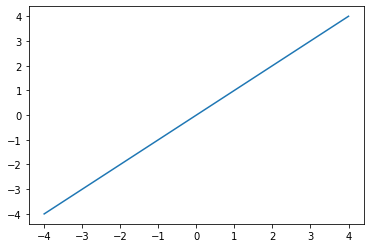

In [11]:
y_linear = func_linear(x)

plt.plot(x, y_linear)

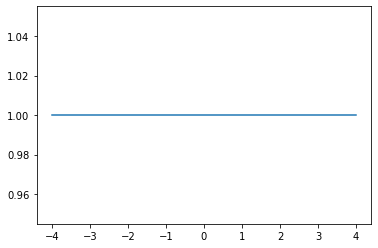

In [12]:
def derivative_linear(x1):
    return np.ones(len(x1))
    
y_lin_deriv = derivative_linear(x)

plt.plot(x, y_lin_deriv)

### Função de ativação Tangente Hiperbólica

$$f(x) = tanh(x)$$

- Implemente uma função em Python que retorne o valor da função tangente hiperbólica para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão
- Utilize bibliotecas para auxiliar nesta tarefa
- Considere o intervalo (-1,1)

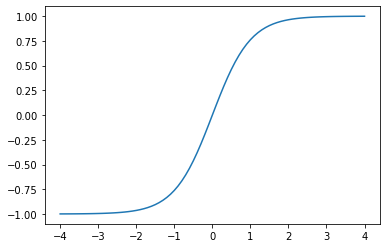

In [13]:
def func_tanh(x1):
    return np.tanh(x1)

y_tanh = func_tanh(x)

# print(y_tanh)

plt.plot(x, y_tanh)

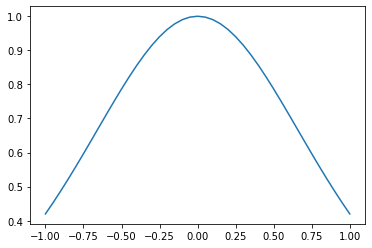

In [14]:
x_tanh = np.arange(-1, 1.05, 0.05)

def tanh_derivative(x1):
    return 1-x1**2
    
y1 = func_tanh(x_tanh)
y_tanh_deriv = tanh_derivative(y1)


plt.plot(x_tanh, y_tanh_deriv)

### Função de Ativação Gaussiana

$$f(x) = \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right)$$

- $\mu$ é o ponto médio (centro) da curva
- $\sigma$ denota o raio de abertura
- Implemente uma função em Python que retorne o valor da função gaussiana para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função em questão


Considere também os seguintes valores ao plotar a função

- Parâmetros nomeados $\mu = 0$ e $\sigma = 1$
- $\mu = 0, \sigma = 0.3$
- $\mu = 0, \sigma = 0.5$
- $\mu = 0, \sigma = 0.7$
- $\mu = 0, \sigma = 0.9$
- $\mu = 0, \sigma = 1.1$

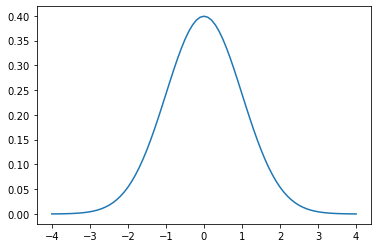

In [22]:
def func_gauss(x1, medio, raio):
    return (np.exp((-1*((x1-medio)**2)/2*(raio**2)))/(np.sqrt(2*np.pi)*raio))
                  
                  
y_gauss = func_gauss(x, 0, 1)
                  
plt.plot(x, y_gauss)

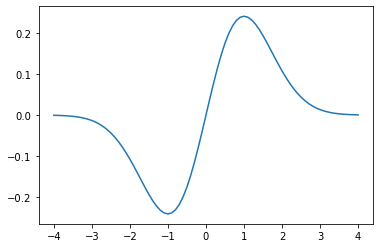

In [18]:
def derivative_gauss(x1, medio, raio):
    return (((x1-medio)*np.exp((-1*((x1-medio)**2)/2*(raio**2))))/(np.sqrt(2*np.pi)*(raio**3)))

y_gauss_deriv = derivative_gauss(x, 0, 1)

plt.plot(x, y_gauss_deriv)

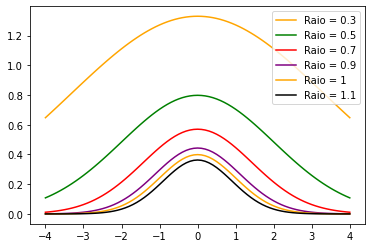

In [21]:
g_03 = func_gauss(x, 0, 0.3)
g_05 = func_gauss(x, 0, 0.5)
g_07 = func_gauss(x, 0, 0.7)
g_09 = func_gauss(x, 0, 0.9)
g_11 = func_gauss(x, 0, 1.1)

plt.plot(x, g_03, "orange")
plt.plot(x, g_05, "green")
plt.plot(x, g_07, "red")
plt.plot(x, g_09, "purple")
plt.plot(x, y_gauss, "orange")
plt.plot(x, g_11, "black")

plt.legend(["Raio = 0.3", "Raio = 0.5", "Raio = 0.7", "Raio = 0.9", "Raio = 1" , "Raio = 1.1"])

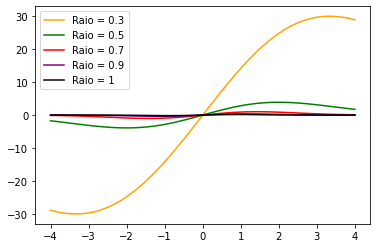

In [24]:
g_d_03 = derivative_gauss(x, 0, 0.3)
g_d_05 = derivative_gauss(x, 0, 0.5)
g_d_07 = derivative_gauss(x, 0, 0.7)
g_d_09 = derivative_gauss(x, 0, 0.9)
g_d_11 = derivative_gauss(x, 0, 1.1)

plt.plot(x, g_d_03, "orange")
plt.plot(x, g_d_05, "green")
plt.plot(x, g_d_07, "red")
plt.plot(x, g_d_09, "purple")
plt.plot(x, g_d_11, "black")

plt.legend(["Raio = 0.3", "Raio = 0.5", "Raio = 0.7", "Raio = 0.9", "Raio = 1" , "Raio = 1.1"])

### Função de Ativação Leaky ReLU

$$f(x) = \left\{\begin{array}{cc} 0.01\cdot x & x < 0\\
x & x \geq 0
\end{array}
\right.$$

- Implemente uma função em Python que retorne o valor da função Leaky ReLU para uma dada entrada
- Plote o gráfico da função no intervalo de entrada previamente especificado
- Implemente uma função que retorne o valor da derivada da função Leaky ReLU

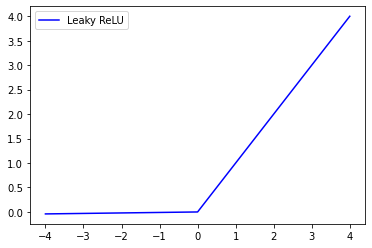

In [29]:
def func_leaky_relu(x1):
    y = np.where(x1 <= 0, x1*0.01, x1)
    return y

y_leakyrelu = func_leaky_relu(x)

plt.plot(x, y_leakyrelu, "blue")

plt.legend(["Leaky ReLU"])

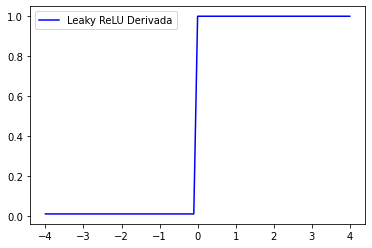

In [30]:
def leaky_relu_derivative(y1):
    deriva = np.where(y1 <= 0, 0.01, 1)
    return deriva

y_derivative_leaky = leaky_relu_derivative(x)

plt.plot(x, y_derivative_leaky, "blue")

plt.legend(["Leaky ReLU Derivada"])